In [1]:
!pip install -U --no-cache-dir \
  "numpy==1.26.4" \
  "pandas==2.2.2" \
  "transformers==4.38.2" \
  "datasets==2.18.0" \
  "scikit-learn" \
  "Sastrawi" \
  "wordcloud"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.7/130.7 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 238.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 213.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 224.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 143.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 254.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 133.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 75.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: fsspec
    Found existing insta

In [46]:
import os
import random
import re
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import transformers
import datasets

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from wordcloud import WordCloud
from datasets import Dataset
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup,
)

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


In [2]:
print("Python:", __import__("sys").version)

Python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [9]:
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("torch:", torch.__version__)
print("transformers:", transformers.__version__)
print("datasets:", datasets.__version__)

numpy: 1.26.4
pandas: 2.2.2
torch: 2.9.0+cu128
transformers: 4.38.2
datasets: 2.18.0


In [10]:
df = pd.read_csv("shopee_mobile_reviews.csv")

In [11]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,52cb16c9-1caa-4d3d-97af-fbd71a7d821c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tetap stay di toko oren, semoga dapat reward d...",5,1,3.67.27,2026-02-11 02:01:42,"Hi kak Malik Fajar, maaf banget ya udah buat g...",2025-07-30 17:11:33,3.67.27
1,c5ed66ef-cdc0-4fb9-b98a-a9d04c2f64ba,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,barang selalu ok,5,0,3.67.27,2026-02-11 02:01:40,"Hi kak Aditia Permana, Makasih yaa buat review...",2026-02-11 05:21:30,3.67.27
2,cd401da9-3570-4f22-a8cb-73cc39cbfcda,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,edit ulasan : tolong untuk keamanan ditingkatk...,5,1,3.67.27,2026-02-11 01:59:57,"Hi kak, maaf y mengenai kndala pd aplikasi Sho...",2024-06-15 17:10:42,3.67.27
3,cfd4452c-fcb6-4b34-a7ab-60ea16948343,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,5,0,3.67.27,2026-02-11 01:59:25,"Hii kak SSS Suka Suka Saya, makasih ya buat re...",2026-01-22 18:09:16,3.67.27
4,18c0f8c2-50ef-4553-a42c-0185480d2180,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"shopee makin hari makin apa²an sih,, barang ya...",3,0,3.67.27,2026-02-11 01:59:25,"Hi kak Altri Anes, makasih ya buat review dan ...",2026-02-11 02:29:01,3.67.27
...,...,...,...,...,...,...,...,...,...,...,...
39995,699c6b98-3f76-4f77-85e4-96cac1f1fbbf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi ini sangat buruk pada penyelesaian ka...,1,2,3.65.23,2025-12-31 06:50:23,Hi kak Rino Surya Wijaya maaf ya terkait ken...,2025-12-31 08:10:56,3.65.23
39996,aac75aa6-48ee-4d6a-af52-7f7193cfb9f2,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,bagus,4,0,3.65.23,2025-12-31 06:45:47,"Hai kak wahyu ningtyas, waah makasih ya untuk ...",2025-12-31 08:52:54,3.65.23
39997,502d4cfe-4ecc-4d90-a3f4-12c74fff60e9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Belanja kebutuhan di sopie praktis tanpa ribet...,5,0,3.65.23,2025-12-31 06:45:12,"Hi kak Rachmat Zamhil, makasih banget ya kak u...",2025-12-31 08:14:26,3.65.23
39998,0a134fbf-8fab-447c-be21-42a116d4a0e3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,👍👍👍👍,5,0,3.64.49,2025-12-31 06:44:54,"Wah makasih ya kak Ainun Najim , buat bintang ...",2025-12-31 08:11:09,3.64.49


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              40000 non-null  object
 1   userName              40000 non-null  object
 2   userImage             40000 non-null  object
 3   content               40000 non-null  object
 4   score                 40000 non-null  int64 
 5   thumbsUpCount         40000 non-null  int64 
 6   reviewCreatedVersion  31220 non-null  object
 7   at                    40000 non-null  object
 8   replyContent          38579 non-null  object
 9   repliedAt             38579 non-null  object
 10  appVersion            31220 non-null  object
dtypes: int64(2), object(9)
memory usage: 3.4+ MB


In [13]:
df = df[["content"]].copy()
df["content"] = df["content"].astype(str).fillna("")

print("Total raw rows:", len(df))
df.head()

Total raw rows: 40000


,content
0,"tetap stay di toko oren, semoga dapat reward d..."
1,barang selalu ok
2,edit ulasan : tolong untuk keamanan ditingkatk...
3,bagus
4,"shopee makin hari makin apa²an sih,, barang ya..."


In [14]:
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/refs/heads/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/refs/heads/master/negative.tsv"

positive_lexicon = set(
    pd.read_csv(positive_url, sep="\t", header=None)[0]
    .astype(str).str.strip().str.lower()
)

negative_lexicon = set(
    pd.read_csv(negative_url, sep="\t", header=None)[0]
    .astype(str).str.strip().str.lower()
)

print("Positive lexicon size:", len(positive_lexicon))
print("Negative lexicon size:", len(negative_lexicon))


Positive lexicon size: 3608
Negative lexicon size: 6607


In [15]:
_re_url = re.compile(r"https?://\S+|www\.[^\s]+", re.IGNORECASE)
_re_non_letter = re.compile(r"[^a-z\s]")
_re_spaces = re.compile(r"\s+")

def clean_for_scoring(text: str):
    text = text.lower()
    text = _re_url.sub(" ", text)
    text = _re_non_letter.sub(" ", text)
    text = _re_spaces.sub(" ", text).strip()
    return text.split()


In [16]:
THRESHOLD_T = 2

def determine_sentiment_threshold(text: str):
    tokens = clean_for_scoring(text)

    pos_count = sum(1 for w in tokens if w in positive_lexicon)
    neg_count = sum(1 for w in tokens if w in negative_lexicon)

    score = pos_count - neg_count

    if score >= THRESHOLD_T:
        return score, "positive"
    elif score <= -THRESHOLD_T:
        return score, "negative"
    else:
        return score, None

df[["score", "sentiment"]] = df["content"].apply(
    lambda x: pd.Series(determine_sentiment_threshold(x))
)

before = len(df)
df = df[df["sentiment"].notna()].copy()
after = len(df)

print("Before:", before)
print("After threshold:", after)
print(df["sentiment"].value_counts())


Before: 40000
After threshold: 11935
sentiment
negative    7238
positive    4697
Name: count, dtype: int64


In [17]:
df["score"].value_counts().sort_index()


,count
score,
-27.0,1
-25.0,2
-23.0,2
-22.0,3
-21.0,10
-20.0,8
-19.0,11
-18.0,12
-17.0,18


In [18]:
df

,content,score,sentiment
2,edit ulasan : tolong untuk keamanan ditingkatk...,3.0,positive
5,spinjam saya minta di aktifin lagi,-2.0,negative
6,PENGIRIMAN SANGAT LAMA,-2.0,negative
7,"jaringan lancar, buka apk lain juga lancar, tp...",-2.0,negative
10,PENGIRIMAN SPX LAMBAT SEKALI! Masa transit den...,-6.0,negative
...,...,...,...
39990,tak perlu banyak ini itu intinya oke banget in...,2.0,positive
39991,gak suka sama iklannya yang maksa banget. GANG...,-6.0,negative
39992,Dah berkali-kali ya Shopee! Komisi Affiliate g...,6.0,positive
39995,aplikasi ini sangat buruk pada penyelesaian ka...,-3.0,negative


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11935 entries, 2 to 39997
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   content    11935 non-null  object 
 1   score      11935 non-null  float64
 2   sentiment  11935 non-null  object 
dtypes: float64(1), object(2)
memory usage: 373.0+ KB


In [20]:
stop_factory = StopWordRemoverFactory()
STOPWORDS_STD = set(stop_factory.get_stop_words())

STOPWORDS_CUSTOM = {
    "saya","aku","kami","kita","kamu","anda",
    "di","ke","dari","untuk","dengan","dan","yang","ini","itu","nya",
    "aja","ya","yg","kok","sih","lah","pun","dong","deh",
    "sudah","udah","lagi","masih","ada","jadi","sekarang","baru","dulu","hari","jam","kali",
    "aplikasi",

    "shopee","shoppe","spay","shopeepay","paylater","spl","spaylater",
    "seller","penjual","pembeli","kurir","expedisi","ekspedisi",
    "voucher","promo","diskon","cashback","koin","coin",
    "checkout","cekout","co","pesanan","order","barang","produk",
    "ongkir","gratisongkir","freeongkir",
    "cs","customerservice","customer","service",
}

STOPWORDS_BASE = STOPWORDS_STD | STOPWORDS_CUSTOM

STOPWORDS_UNI_ONLY = {
    "sangat","banget","amat",
    "kenapa","padahal","malah","tolong",
    "apa","gimana","bagaimana","apakah",
}

kamus_normalisasi = {
    "gk": "tidak", "ga": "tidak", "gak": "tidak", "nggak": "tidak", "tdk": "tidak",
    "bgt": "banget", "bgtt": "banget", "bngt": "banget",
    "lemottt": "lemot",
    "ok": "oke",
    "bgs": "bagus",
    "apk": "aplikasi", "app": "aplikasi",
    "klo": "kalau", "kalo": "kalau",
    "hp": "handphone",
    "tp": "tapi", "tpi": "tapi",
    "knp": "kenapa", "knpa": "kenapa",
    "lg": "lagi",
    "udh": "sudah", "sdh": "sudah",
    "sy": "saya", "sya": "saya",
    "skrg": "sekarang",
    "tf": "transfer",
    "jd": "jadi",
    "ku": "aku",
    "cs": "customer service",
    "kpd": "kepada",
    "trus": "terus",
    "slalu": "selalu",
    "karna": "karena",
    "gw": "saya", "gua": "saya",
    "pd": "pada",
    "dg": "dengan",
    "ngk": "tidak",
    "jg": "juga",
    "tgl": "tanggal",
    "pake": "pakai",
    # shopee-ish
    "gaes": "guys",
}

# stemmer untuk EDA saja
stemmer = StemmerFactory().create_stemmer()

# regex compile
_re_url = re.compile(r"https?://\S+|www\.[^\s]+", re.IGNORECASE)
_re_elong = re.compile(r"(.)\1{2,}")         # huruf panjang
_re_spaces = re.compile(r"\s+")
# untuk EDA (lebih agresif): sisakan huruf
_re_non_letter = re.compile(r"[^a-z\s]")

def reduce_elongation(text: str) -> str:
    return _re_elong.sub(r"\1\1", text)

def normalize_tokens(tokens):
    return [kamus_normalisasi.get(t, t) for t in tokens]

In [21]:
def preprocess_for_bert(text: str) -> str:
    text = str(text).lower()
    text = _re_url.sub(" ", text)
    text = reduce_elongation(text)
    text = _re_spaces.sub(" ", text).strip()
    if not text:
        return ""
    toks = normalize_tokens(text.split())
    return " ".join(toks)

df["text_bert"] = df["content"].apply(preprocess_for_bert)

df = df[df["text_bert"].str.len() > 0].copy()

print("Rows after text_bert:", len(df))
df[["content", "text_bert", "sentiment"]].head(5)


Rows after text_bert: 11935


,content,text_bert,sentiment
2,edit ulasan : tolong untuk keamanan ditingkatk...,edit ulasan : tolong untuk keamanan ditingkatk...,positive
5,spinjam saya minta di aktifin lagi,spinjam saya minta di aktifin lagi,negative
6,PENGIRIMAN SANGAT LAMA,pengiriman sangat lama,negative
7,"jaringan lancar, buka apk lain juga lancar, tp...","jaringan lancar, buka aplikasi lain juga lanca...",negative
10,PENGIRIMAN SPX LAMBAT SEKALI! Masa transit den...,pengiriman spx lambat sekali! masa transit den...,negative


In [22]:
def preprocess_to_tokens_eda(text: str, min_len_token: int = 4):
    text = str(text).lower()
    text = _re_url.sub(" ", text)
    text = reduce_elongation(text)
    text = _re_non_letter.sub(" ", text)
    text = _re_spaces.sub(" ", text).strip()
    if not text:
        return []

    toks = normalize_tokens(text.split())
    # stemming khusus EDA
    toks = [stemmer.stem(t) for t in toks]

    # hapus token pendek
    toks = [t for t in toks if len(t) >= min_len_token]
    return toks

def remove_stopwords(tokens, stopwords_set):
    return [t for t in tokens if t not in stopwords_set]

tokens_all_eda = df["content"].apply(preprocess_to_tokens_eda)

df["text_ng"] = tokens_all_eda.apply(lambda toks: " ".join(remove_stopwords(toks, STOPWORDS_BASE)))


stop_uni = STOPWORDS_BASE | STOPWORDS_UNI_ONLY
df["text_uni"] = tokens_all_eda.apply(lambda toks: " ".join(remove_stopwords(toks, stop_uni)))

df = df[df["text_ng"].str.len() > 0].copy()

print("Rows after EDA preprocessing:", len(df))
df[["content", "text_bert", "text_ng", "text_uni", "sentiment"]].head(5)


Rows after EDA preprocessing: 11894


,content,text_bert,text_ng,text_uni,sentiment
2,edit ulasan : tolong untuk keamanan ditingkatk...,edit ulasan : tolong untuk keamanan ditingkatk...,edit ulas aman tingkat banyak tipu kirim chat ...,edit ulas aman tingkat banyak tipu kirim chat ...,positive
5,spinjam saya minta di aktifin lagi,spinjam saya minta di aktifin lagi,spinjam minta aktifin,spinjam minta aktifin,negative
6,PENGIRIMAN SANGAT LAMA,pengiriman sangat lama,kirim sangat lama,kirim lama,negative
7,"jaringan lancar, buka apk lain juga lancar, tp...","jaringan lancar, buka aplikasi lain juga lanca...",jaring lancar buka lancar buka gabisa halaman ...,jaring lancar buka lancar buka gabisa halaman ...,negative
10,PENGIRIMAN SPX LAMBAT SEKALI! Masa transit den...,pengiriman spx lambat sekali! masa transit den...,kirim lambat sekali masa transit estimasi ubah...,kirim lambat sekali masa transit estimasi ubah...,negative


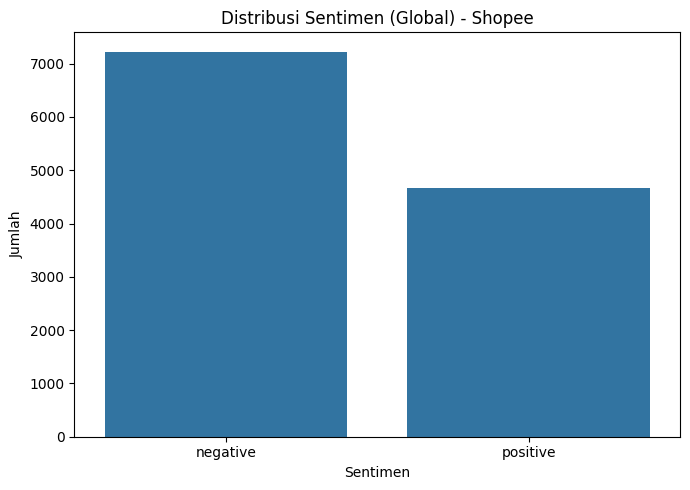

,count
sentiment,
negative,7225
positive,4669


In [23]:
order_sent = ["negative", "positive"]

plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x="sentiment", order=order_sent)
ax.set_title("Distribusi Sentimen (Global) - Shopee")
ax.set_xlabel("Sentimen")
ax.set_ylabel("Jumlah")
plt.tight_layout()
plt.show()

df["sentiment"].value_counts()


In [24]:
def plot_ngram_bar_gradient(df_ng, title: str, palette_name: str = "viridis"):
    if df_ng is None or df_ng.empty:
        print(f"[INFO] {title}: kosong.")
        return

    df_plot = df_ng.sort_values("freq", ascending=False).copy()
    pal = sns.color_palette(palette_name, n_colors=len(df_plot))

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=df_plot,
        x="freq",
        y="ngram",
        palette=pal
    )
    ax.set_title(title)
    ax.set_xlabel("Frekuensi")
    ax.set_ylabel("N-gram")
    plt.tight_layout()
    plt.show()


In [25]:
# %%
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(
    texts,
    ngram_range=(1, 1),
    top_k=20,
    min_df=5,
    max_df=0.95
):
    """
    texts: iterable of string (sudah preprocessed)
    Return: DataFrame ['ngram','freq']
    """
    vect = CountVectorizer(
        ngram_range=ngram_range,
        min_df=min_df,
        max_df=max_df
    )
    X = vect.fit_transform(texts)
    freqs = np.asarray(X.sum(axis=0)).ravel()
    terms = np.array(vect.get_feature_names_out())

    df_ng = pd.DataFrame({"ngram": terms, "freq": freqs})
    df_ng = df_ng.sort_values("freq", ascending=False).head(top_k).reset_index(drop=True)
    return df_ng

TEXT_UNI_COL = "text_uni"
TEXT_NG_COL = "text_ng"

# safety: buang yang kosong
texts_uni = df[TEXT_UNI_COL].fillna("").astype(str)
texts_ng = df[TEXT_NG_COL].fillna("").astype(str)
texts_uni = texts_uni[texts_uni.str.len() > 0]
texts_ng = texts_ng[texts_ng.str.len() > 0]

print("texts_uni:", len(texts_uni))
print("texts_ng :", len(texts_ng))


texts_uni: 11839
texts_ng : 11894


/tmp/ipython-input-2433655373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


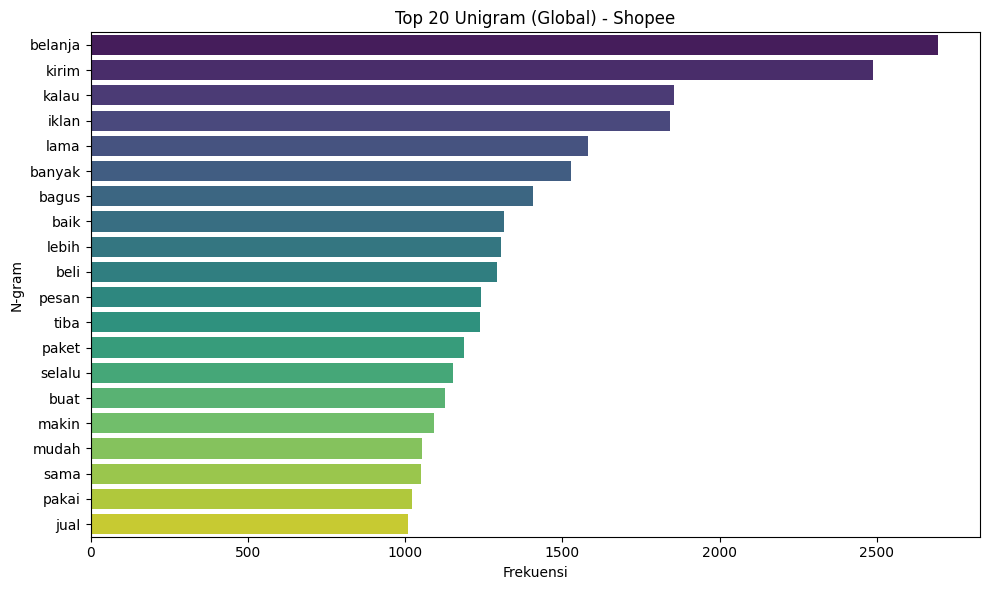

,ngram,freq
0,belanja,2693
1,kirim,2487
2,kalau,1856
3,iklan,1843
4,lama,1580
5,banyak,1527
6,bagus,1406
7,baik,1316
8,lebih,1306
9,beli,1293


In [26]:
top_uni = get_top_ngrams(
    texts=texts_uni,
    ngram_range=(1, 1),
    top_k=20,
    min_df=10
)
plot_ngram_bar_gradient(top_uni, "Top 20 Unigram (Global) - Shopee", palette_name="viridis")
top_uni


/tmp/ipython-input-2433655373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


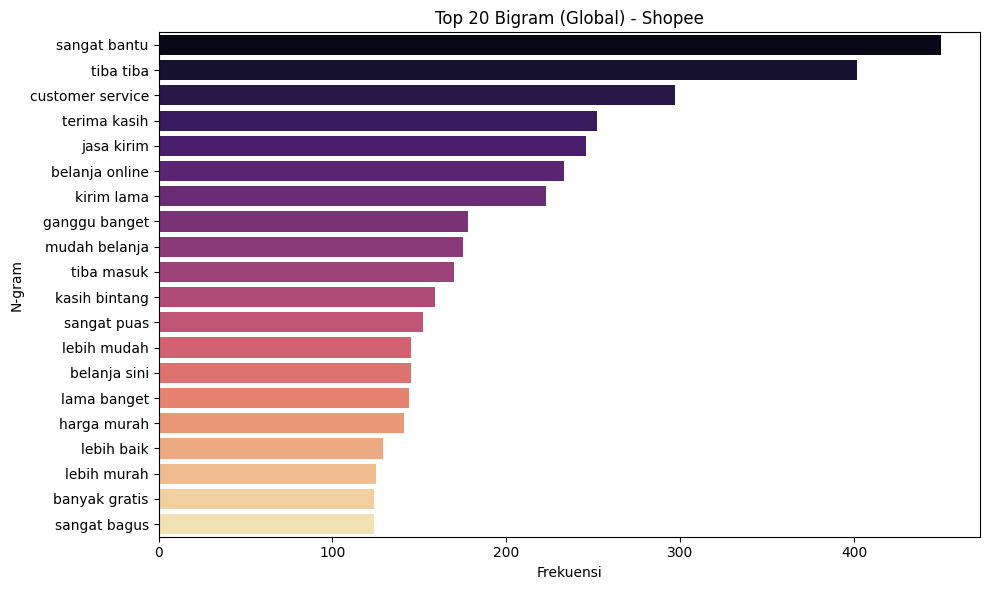

,ngram,freq
0,sangat bantu,450
1,tiba tiba,402
2,customer service,297
3,terima kasih,252
4,jasa kirim,246
5,belanja online,233
6,kirim lama,223
7,ganggu banget,178
8,mudah belanja,175
9,tiba masuk,170


In [27]:
top_bi = get_top_ngrams(
    texts=texts_ng,
    ngram_range=(2, 2),
    top_k=20,
    min_df=8
)
plot_ngram_bar_gradient(top_bi, "Top 20 Bigram (Global) - Shopee", palette_name="magma")
top_bi


/tmp/ipython-input-2433655373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


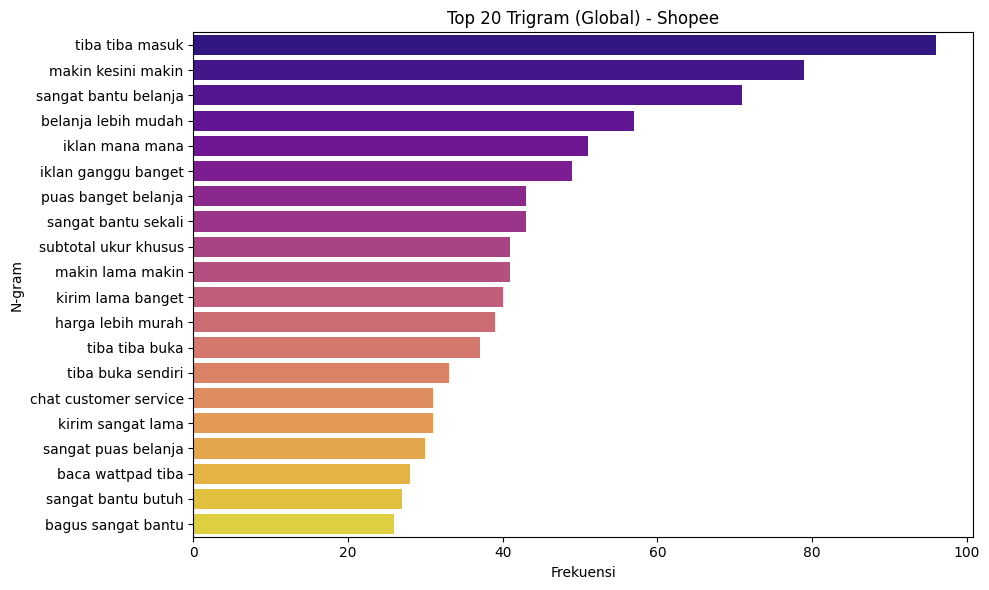

,ngram,freq
0,tiba tiba masuk,96
1,makin kesini makin,79
2,sangat bantu belanja,71
3,belanja lebih mudah,57
4,iklan mana mana,51
5,iklan ganggu banget,49
6,puas banget belanja,43
7,sangat bantu sekali,43
8,subtotal ukur khusus,41
9,makin lama makin,41


In [28]:
top_tri = get_top_ngrams(
    texts=texts_ng,
    ngram_range=(3, 3),
    top_k=20,
    min_df=5
)
plot_ngram_bar_gradient(top_tri, "Top 20 Trigram (Global) - Shopee", palette_name="plasma")
top_tri


/tmp/ipython-input-2433655373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


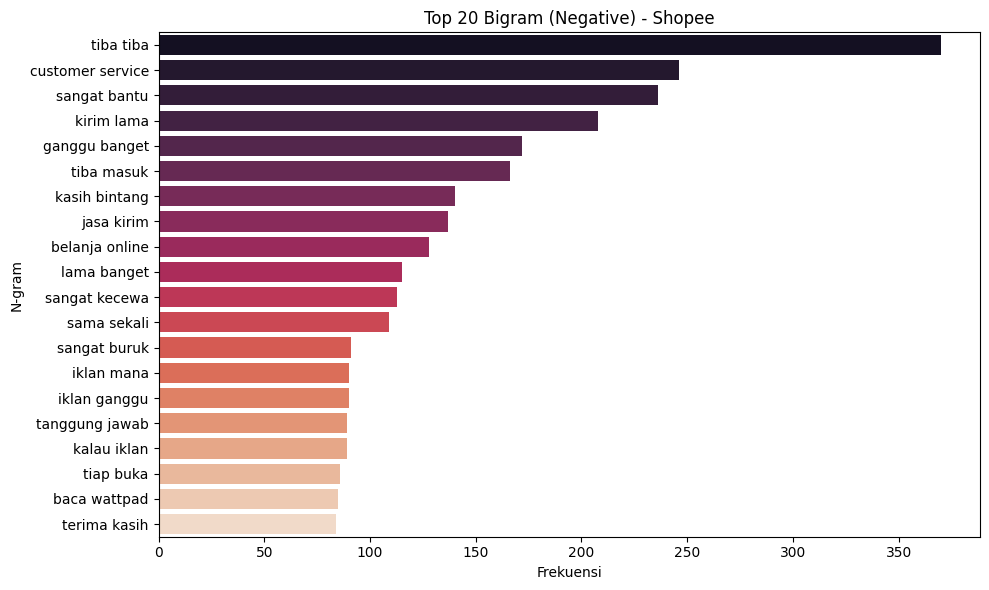

/tmp/ipython-input-2433655373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


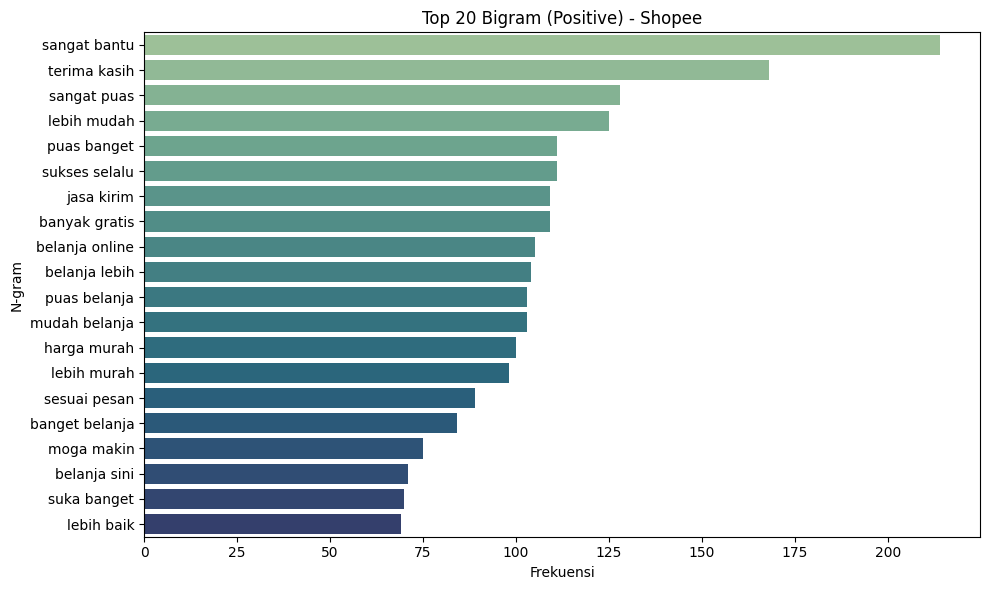

(              ngram  freq
 0         tiba tiba   370
 1  customer service   246
 2      sangat bantu   236
 3        kirim lama   208
 4     ganggu banget   172,
           ngram  freq
 0  sangat bantu   214
 1  terima kasih   168
 2   sangat puas   128
 3   lebih mudah   125
 4   puas banget   111)

In [29]:
def top_ngrams_by_sentiment(df, sentiment_value, text_col, ngram_range, top_k=20, min_df=5):
    sub = df[df["sentiment"] == sentiment_value][text_col].fillna("").astype(str)
    sub = sub[sub.str.len() > 0]
    if len(sub) == 0:
        return pd.DataFrame(columns=["ngram","freq"])
    return get_top_ngrams(sub, ngram_range=ngram_range, top_k=top_k, min_df=min_df)

bi_neg = top_ngrams_by_sentiment(df, "negative", TEXT_NG_COL, (2,2), top_k=20, min_df=5)
bi_pos = top_ngrams_by_sentiment(df, "positive", TEXT_NG_COL, (2,2), top_k=20, min_df=5)

plot_ngram_bar_gradient(bi_neg, "Top 20 Bigram (Negative) - Shopee", palette_name="rocket")
plot_ngram_bar_gradient(bi_pos, "Top 20 Bigram (Positive) - Shopee", palette_name="crest")

bi_neg.head(), bi_pos.head()


/tmp/ipython-input-2433655373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


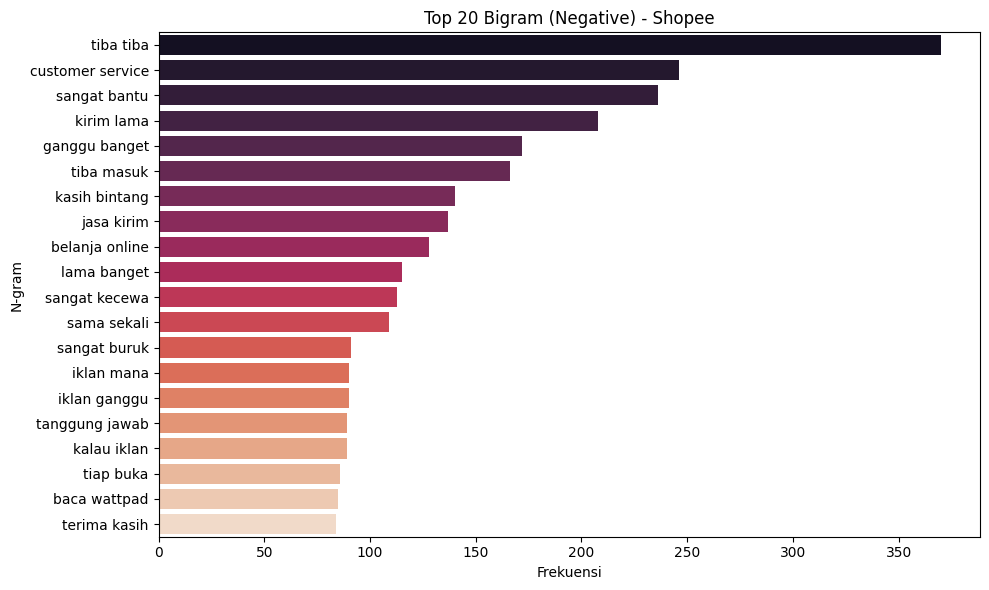

/tmp/ipython-input-2433655373.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


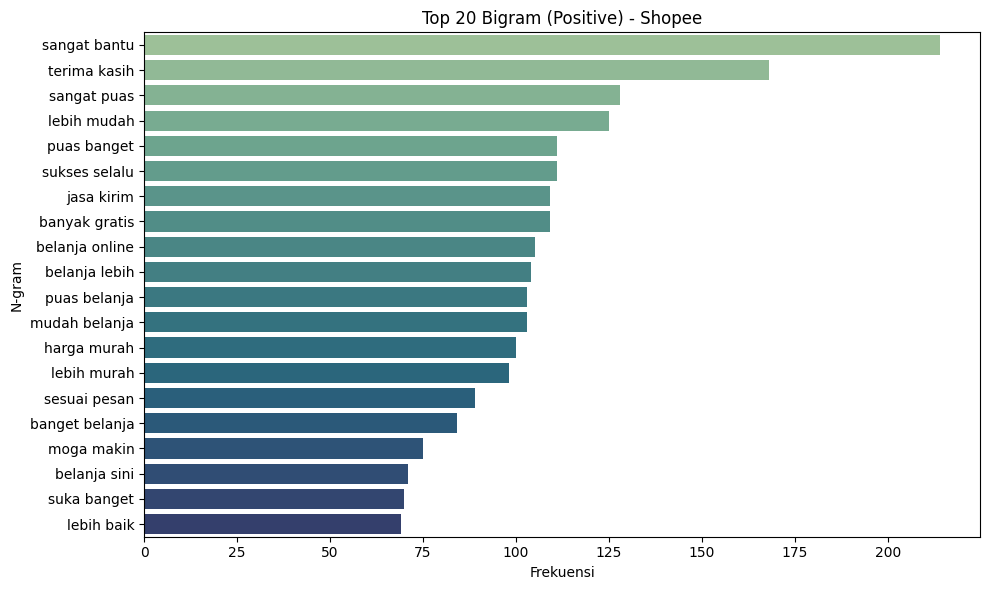

(              ngram  freq
 0         tiba tiba   370
 1  customer service   246
 2      sangat bantu   236
 3        kirim lama   208
 4     ganggu banget   172,
           ngram  freq
 0  sangat bantu   214
 1  terima kasih   168
 2   sangat puas   128
 3   lebih mudah   125
 4   puas banget   111)

In [30]:
def top_ngrams_by_sentiment(df, sentiment_value, text_col, ngram_range, top_k=20, min_df=5):
    sub = df[df["sentiment"] == sentiment_value][text_col].fillna("").astype(str)
    sub = sub[sub.str.len() > 0]
    if len(sub) == 0:
        return pd.DataFrame(columns=["ngram","freq"])
    return get_top_ngrams(sub, ngram_range=ngram_range, top_k=top_k, min_df=min_df)

bi_neg = top_ngrams_by_sentiment(df, "negative", TEXT_NG_COL, (2,2), top_k=20, min_df=5)
bi_pos = top_ngrams_by_sentiment(df, "positive", TEXT_NG_COL, (2,2), top_k=20, min_df=5)

plot_ngram_bar_gradient(bi_neg, "Top 20 Bigram (Negative) - Shopee", palette_name="rocket")
plot_ngram_bar_gradient(bi_pos, "Top 20 Bigram (Positive) - Shopee", palette_name="crest")

bi_neg.head(), bi_pos.head()


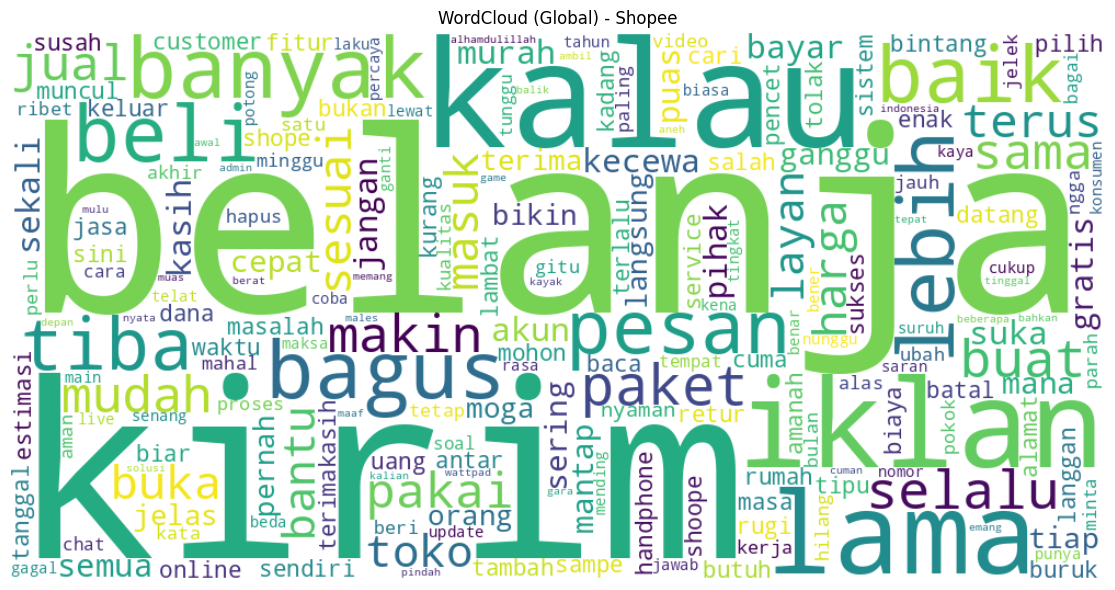

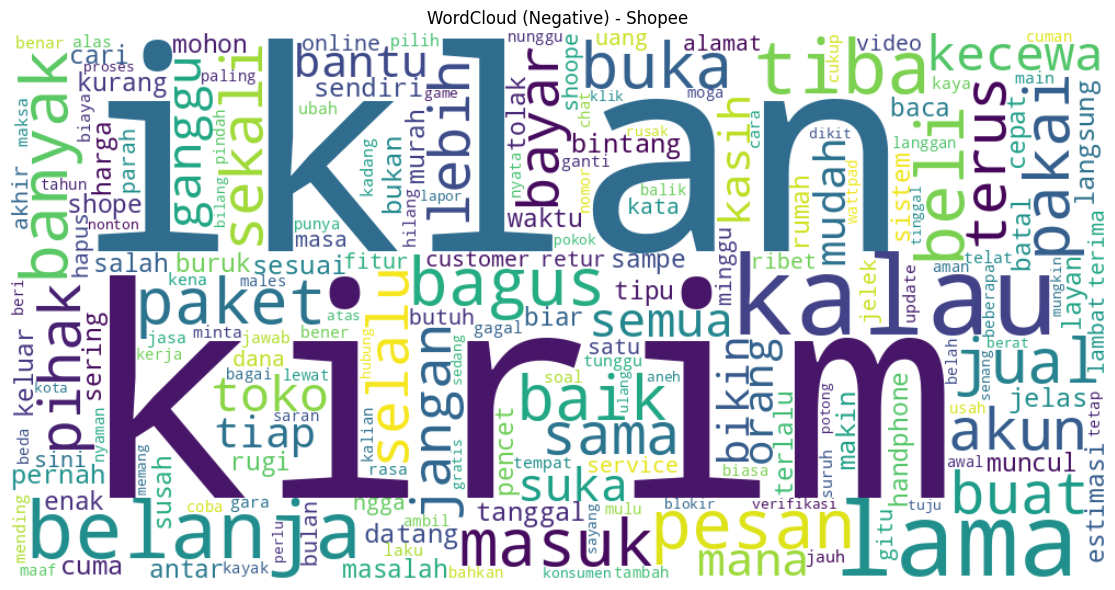

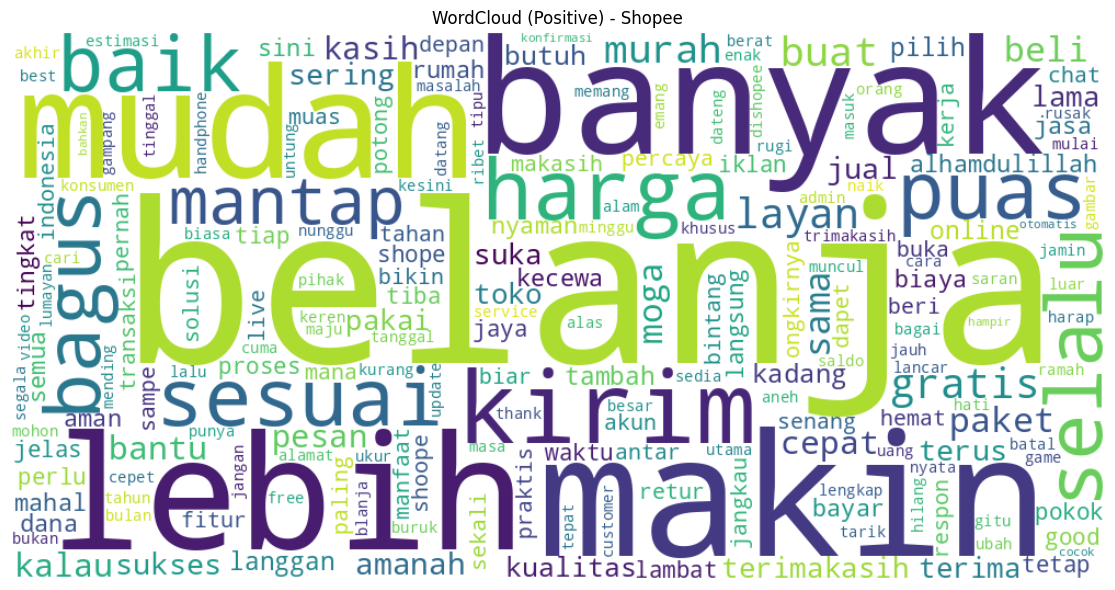

In [31]:
def plot_wordcloud(text, title, width=1000, height=500):
    if not text or not text.strip():
        print(f"[INFO] WordCloud {title}: teks kosong.")
        return

    wc = WordCloud(
        width=width,
        height=height,
        background_color="white",
        collocations=False
    ).generate(text)

    plt.figure(figsize=(12, 6))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Global wordcloud
text_global = " ".join(df[TEXT_UNI_COL].fillna("").astype(str).tolist())
plot_wordcloud(text_global, "WordCloud (Global) - Shopee")

# Per sentiment
text_neg = " ".join(df[df["sentiment"]=="negative"][TEXT_UNI_COL].fillna("").astype(str).tolist())
text_pos = " ".join(df[df["sentiment"]=="positive"][TEXT_UNI_COL].fillna("").astype(str).tolist())

plot_wordcloud(text_neg, "WordCloud (Negative) - Shopee")
plot_wordcloud(text_pos, "WordCloud (Positive) - Shopee")


In [32]:
def set_seed_all(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)

set_seed_all(42)

TEXT_COL = "text_bert"
LABEL_COL = "sentiment"

label2id = {"negative": 0, "positive": 1}
id2label = {0: "negative", 1: "positive"}

assert TEXT_COL in df.columns, f"df harus punya kolom '{TEXT_COL}'"
assert LABEL_COL in df.columns, f"df harus punya kolom '{LABEL_COL}'"

df = df.copy()
df[LABEL_COL] = df[LABEL_COL].astype(str).str.lower()
df = df[df[LABEL_COL].isin(label2id)].copy()
df["label"] = df[LABEL_COL].map(label2id).astype(int)

print(df[[TEXT_COL, LABEL_COL, "label"]].head())
print("Rows:", len(df))
print(df[LABEL_COL].value_counts())

                                            text_bert sentiment  label
2   edit ulasan : tolong untuk keamanan ditingkatk...  positive      1
5                  spinjam saya minta di aktifin lagi  negative      0
6                              pengiriman sangat lama  negative      0
7   jaringan lancar, buka aplikasi lain juga lanca...  negative      0
10  pengiriman spx lambat sekali! masa transit den...  negative      0
Rows: 11894
sentiment
negative    7225
positive    4669
Name: count, dtype: int64


In [33]:
train_df, test_df = train_test_split(
    df[[TEXT_COL, "label"]].copy(),
    test_size=0.30,
    random_state=42,
    stratify=df["label"],
)

print("Train:", len(train_df), "Test:", len(test_df))
print("Train dist:\n", train_df["label"].value_counts(normalize=True))
print("Test dist:\n", test_df["label"].value_counts(normalize=True))

train_ds = Dataset.from_pandas(train_df.reset_index(drop=True))
test_ds  = Dataset.from_pandas(test_df.reset_index(drop=True))


Train: 8325 Test: 3569
Train dist:
 label
0    0.607447
1    0.392553
Name: proportion, dtype: float64
Test dist:
 label
0    0.607453
1    0.392547
Name: proportion, dtype: float64


In [34]:
def compute_metrics_from_preds(y_true, y_pred):
    return {
        "accuracy": accuracy_score(y_true, y_pred),
        "f1_macro": f1_score(y_true, y_pred, average="macro"),
        "f1_weighted": f1_score(y_true, y_pred, average="weighted"),
    }


In [39]:
def make_collate_fn(tokenizer):
    pad_id = tokenizer.pad_token_id if tokenizer.pad_token_id is not None else 0

    def collate(batch):
        labels = torch.stack([x["label"] for x in batch]).long()

        max_len = max(x["input_ids"].shape[0] for x in batch)

        def pad_1d(x, pad_value):
            pad_len = max_len - x.shape[0]
            if pad_len <= 0:
                return x
            return torch.cat([x, torch.full((pad_len,), pad_value, dtype=x.dtype)], dim=0)

        input_ids = torch.stack([pad_1d(x["input_ids"], pad_id) for x in batch])
        attention_mask = torch.stack([pad_1d(x["attention_mask"], 0) for x in batch])

        out = {"input_ids": input_ids, "attention_mask": attention_mask, "label": labels}

        if "token_type_ids" in batch[0]:
            token_type_ids = torch.stack([pad_1d(x["token_type_ids"], 0) for x in batch])
            out["token_type_ids"] = token_type_ids

        return out

    return collate


In [40]:
def make_loaders(model_id: str, max_len: int = 128, batch_train: int = 16, batch_eval: int = 32):
    tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True)

    def tok(batch):
        return tokenizer(batch[TEXT_COL], truncation=True, max_length=max_len)

    tr = train_ds.map(tok, batched=True)
    te = test_ds.map(tok, batched=True)

    cols = ["input_ids", "attention_mask", "label"]
    if "token_type_ids" in tr.column_names:
        cols.append("token_type_ids")

    tr = tr.with_format("torch", columns=cols)
    te = te.with_format("torch", columns=cols)

    collate_fn = make_collate_fn(tokenizer)

    train_loader = DataLoader(tr, batch_size=batch_train, shuffle=True, collate_fn=collate_fn)
    eval_loader  = DataLoader(te, batch_size=batch_eval, shuffle=False, collate_fn=collate_fn)

    return tokenizer, train_loader, eval_loader


In [41]:
def finetune_one_model_manual(
    model_id: str,
    run_name: str,
    max_len: int = 128,
    epochs: int = 3,
    lr: float = 2e-5,
    batch_train: int = 16,
    batch_eval: int = 32,
    warmup_ratio: float = 0.1,
):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print("\n" + "="*80)
    print("RUN:", run_name)
    print("MODEL:", model_id)
    print("DEVICE:", device)
    print("="*80)

    tokenizer, train_loader, eval_loader = make_loaders(
        model_id=model_id,
        max_len=max_len,
        batch_train=batch_train,
        batch_eval=batch_eval,
    )

    model = AutoModelForSequenceClassification.from_pretrained(
        model_id,
        num_labels=2,
        id2label=id2label,
        label2id=label2id,
    ).to(device)

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=0.01)

    total_steps = epochs * len(train_loader)
    warmup_steps = int(warmup_ratio * total_steps)
    scheduler = get_linear_schedule_with_warmup(
        optimizer, num_warmup_steps=warmup_steps, num_training_steps=total_steps
    )

    best_f1 = -1.0
    save_dir = f"./best_{run_name}"
    os.makedirs(save_dir, exist_ok=True)

    for epoch in range(1, epochs + 1):

        model.train()
        total_loss = 0.0

        for batch in train_loader:
            optimizer.zero_grad()

            batch = {k: v.to(device) for k, v in batch.items()}
            labels = batch["label"]

            inputs = {k: v for k, v in batch.items() if k != "label"}
            outputs = model(**inputs, labels=labels)

            loss = outputs.loss
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            scheduler.step()

            total_loss += loss.item()

        avg_loss = total_loss / max(1, len(train_loader))


        model.eval()
        y_true_list, y_pred_list = [], []

        with torch.no_grad():
            for batch in eval_loader:
                batch = {k: v.to(device) for k, v in batch.items()}
                labels = batch["label"].detach().cpu().numpy()

                inputs = {k: v for k, v in batch.items() if k != "label"}
                outputs = model(**inputs)
                preds = torch.argmax(outputs.logits, dim=-1).detach().cpu().numpy()

                y_true_list.append(labels)
                y_pred_list.append(preds)

        y_true = np.concatenate(y_true_list)
        y_pred = np.concatenate(y_pred_list)

        metrics = compute_metrics_from_preds(y_true, y_pred)
        print(f"Epoch {epoch} | train_loss={avg_loss:.4f} | "
              f"acc={metrics['accuracy']:.4f} | f1_macro={metrics['f1_macro']:.4f} | f1_weighted={metrics['f1_weighted']:.4f}")

        if metrics["f1_macro"] > best_f1:
            best_f1 = metrics["f1_macro"]
            model.save_pretrained(save_dir)
            tokenizer.save_pretrained(save_dir)

    print("\nBest saved to:", save_dir)

    best_model = AutoModelForSequenceClassification.from_pretrained(save_dir).to(device)
    best_model.eval()

    y_true_list, y_pred_list = [], []
    with torch.no_grad():
        for batch in eval_loader:
            batch = {k: v.to(device) for k, v in batch.items()}
            labels = batch["label"].detach().cpu().numpy()

            inputs = {k: v for k, v in batch.items() if k != "label"}
            outputs = best_model(**inputs)
            preds = torch.argmax(outputs.logits, dim=-1).detach().cpu().numpy()

            y_true_list.append(labels)
            y_pred_list.append(preds)

    y_true = np.concatenate(y_true_list)
    y_pred = np.concatenate(y_pred_list)

    final_metrics = compute_metrics_from_preds(y_true, y_pred)
    print("\nEval metrics:", final_metrics)

    print("\nClassification report:")
    print(classification_report(y_true, y_pred, target_names=[id2label[0], id2label[1]]))

    print("Confusion matrix:")
    print(confusion_matrix(y_true, y_pred))

    return final_metrics, save_dir


In [42]:
metrics_indobert, path_indobert = finetune_one_model_manual(
    model_id="indolem/indobert-base-uncased",
    run_name="combo1_indobert_base_70_30",
    max_len=128,
    epochs=3,
    lr=2e-5
)


RUN: combo1_indobert_base_70_30
MODEL: indolem/indobert-base-uncased
DEVICE: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:949: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Map:   0%|          | 0/8325 [00:00<?, ? examples/s]

Map:   0%|          | 0/3569 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | train_loss=0.3648 | acc=0.9221 | f1_macro=0.9183 | f1_weighted=0.9221
Epoch 2 | train_loss=0.1704 | acc=0.9364 | f1_macro=0.9314 | f1_weighted=0.9354
Epoch 3 | train_loss=0.0999 | acc=0.9496 | f1_macro=0.9467 | f1_weighted=0.9494

Best saved to: ./best_combo1_indobert_base_70_30

Eval metrics: {'accuracy': 0.9495657046791819, 'f1_macro': 0.9467186900769802, 'f1_weighted': 0.9493655509253301}

Classification report:
              precision    recall  f1-score   support

    negative       0.95      0.97      0.96      2168
    positive       0.95      0.92      0.93      1401

    accuracy                           0.95      3569
   macro avg       0.95      0.94      0.95      3569
weighted avg       0.95      0.95      0.95      3569

Confusion matrix:
[[2107   61]
 [ 119 1282]]


In [43]:
metrics_indobertweet, path_indobertweet = finetune_one_model_manual(
    model_id="indolem/indobertweet-base-uncased",
    run_name="combo2_indobertweet_70_30",
    max_len=128,
    epochs=3,
    lr=2e-5
)


RUN: combo2_indobertweet_70_30
MODEL: indolem/indobertweet-base-uncased
DEVICE: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:949: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/8325 [00:00<?, ? examples/s]

Map:   0%|          | 0/3569 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobertweet-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | train_loss=0.3398 | acc=0.9235 | f1_macro=0.9200 | f1_weighted=0.9236
Epoch 2 | train_loss=0.1299 | acc=0.9367 | f1_macro=0.9319 | f1_weighted=0.9358
Epoch 3 | train_loss=0.0531 | acc=0.9512 | f1_macro=0.9484 | f1_weighted=0.9510

Best saved to: ./best_combo2_indobertweet_70_30

Eval metrics: {'accuracy': 0.9512468478565425, 'f1_macro': 0.948409396477185, 'f1_weighted': 0.9510095460685437}

Classification report:
              precision    recall  f1-score   support

    negative       0.95      0.98      0.96      2168
    positive       0.96      0.91      0.94      1401

    accuracy                           0.95      3569
   macro avg       0.95      0.94      0.95      3569
weighted avg       0.95      0.95      0.95      3569

Confusion matrix:
[[2116   52]
 [ 122 1279]]


In [44]:
metrics_distil, path_distil = finetune_one_model_manual(
    model_id="cahya/distilbert-base-indonesian",
    run_name="combo3_distilindobert_70_30",
    max_len=128,
    epochs=3,
    lr=3e-5
)


RUN: combo3_distilindobert_70_30
MODEL: cahya/distilbert-base-indonesian
DEVICE: cuda


/usr/local/lib/python3.12/dist-packages/huggingface_hub/file_download.py:949: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/8325 [00:00<?, ? examples/s]

Map:   0%|          | 0/3569 [00:00<?, ? examples/s]

pytorch_model.bin:   0%|          | 0.00/273M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at cahya/distilbert-base-indonesian and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1 | train_loss=0.2850 | acc=0.9389 | f1_macro=0.9348 | f1_weighted=0.9383
Epoch 2 | train_loss=0.0987 | acc=0.9571 | f1_macro=0.9547 | f1_weighted=0.9570
Epoch 3 | train_loss=0.0305 | acc=0.9594 | f1_macro=0.9571 | f1_weighted=0.9592

Best saved to: ./best_combo3_distilindobert_70_30

Eval metrics: {'accuracy': 0.9593723732137853, 'f1_macro': 0.9570965265766418, 'f1_weighted': 0.9592200963706674}

Classification report:
              precision    recall  f1-score   support

    negative       0.96      0.98      0.97      2168
    positive       0.97      0.93      0.95      1401

    accuracy                           0.96      3569
   macro avg       0.96      0.95      0.96      3569
weighted avg       0.96      0.96      0.96      3569

Confusion matrix:
[[2123   45]
 [ 100 1301]]


In [45]:
summary = pd.DataFrame([
    {"run": "combo1_indobert_base_70_30", **metrics_indobert, "saved_path": path_indobert},
    {"run": "combo2_indobertweet_70_30", **metrics_indobertweet, "saved_path": path_indobertweet},
    {"run": "combo3_distilindobert_70_30", **metrics_distil, "saved_path": path_distil},
])

summary


,run,accuracy,f1_macro,f1_weighted,saved_path
0,combo1_indobert_base_70_30,0.949566,0.946719,0.949366,./best_combo1_indobert_base_70_30
1,combo2_indobertweet_70_30,0.951247,0.948409,0.951010,./best_combo2_indobertweet_70_30
2,combo3_distilindobert_70_30,0.959372,0.957097,0.959220,./best_combo3_distilindobert_70_30


In [47]:
def load_model_for_inference(model_dir: str):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    tok = AutoTokenizer.from_pretrained(model_dir, use_fast=True)
    mdl = AutoModelForSequenceClassification.from_pretrained(model_dir).to(device)
    mdl.eval()
    return tok, mdl, device

def predict_texts(texts, tokenizer, model, device, max_len=128):
    # texts: list[str]
    enc = tokenizer(
        texts,
        truncation=True,
        max_length=max_len,
        padding=True,
        return_tensors="pt",
    )
    enc = {k: v.to(device) for k, v in enc.items()}

    with torch.no_grad():
        logits = model(**enc).logits
        probs = torch.softmax(logits, dim=-1).detach().cpu().numpy()
        pred_ids = probs.argmax(axis=-1)

    pred_labels = [id2label[int(i)] for i in pred_ids]
    conf = probs.max(axis=-1)

    return pred_labels, conf, probs

In [48]:
best_dir = "./best_combo3_distilindobert_70_30"


tokenizer_inf, model_inf, device_inf = load_model_for_inference(best_dir)

sample_texts = [
    "Aplikasinya error terus, paylater tidak bisa dipakai, parah banget.",
    "Mantap, checkout cepat, voucher kepakai dan pengiriman juga cepat.",
    "CS lama responnya, refund lama sekali."
]

sample_texts_pp = [preprocess_for_bert(t) for t in sample_texts]

pred_labels, conf, probs = predict_texts(sample_texts_pp, tokenizer_inf, model_inf, device_inf, max_len=128)

for t_raw, t_pp, y, c in zip(sample_texts, sample_texts_pp, pred_labels, conf):
    print("TEXT :", t_raw)
    print("CLEAN:", t_pp)
    print("PRED :", y, "| confidence:", float(c))
    print("-"*60)


TEXT : Aplikasinya error terus, paylater tidak bisa dipakai, parah banget.
CLEAN: aplikasinya error terus, paylater tidak bisa dipakai, parah banget.
PRED : negative | confidence: 0.9997560381889343
------------------------------------------------------------
TEXT : Mantap, checkout cepat, voucher kepakai dan pengiriman juga cepat.
CLEAN: mantap, checkout cepat, voucher kepakai dan pengiriman juga cepat.
PRED : positive | confidence: 0.9998805522918701
------------------------------------------------------------
TEXT : CS lama responnya, refund lama sekali.
CLEAN: customer service lama responnya, refund lama sekali.
PRED : negative | confidence: 0.9998553991317749
------------------------------------------------------------


In [9]:
!pip freeze > requirements.txt

In [11]:
!cat requirements.txt


absl-py==1.4.0
accelerate==1.12.0
access==1.1.10.post3
affine==2.4.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.3
aiosignal==1.4.0
aiosqlite==0.22.1
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.18.3
altair==5.5.0
annotated-doc==0.0.4
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.12.1
anywidget==0.9.21
apsw==3.51.2.0
apswutils==0.1.2
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.3
arrow==1.4.0
arviz==0.22.0
astropy==7.2.0
astropy-iers-data==0.2026.2.2.0.48.1
asttokens==3.0.1
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.1.0
Authlib==1.6.6
autograd==1.8.0
babel==2.18.0
backcall==0.2.0
beartype==0.22.9
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.33.0
bigquery-magics==0.10.3
bleach==6.3.0
blinker==1.9.0
blis==1.3.3
blobfile==3.1.0
blosc2==4.0.0
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
brotli==1.2.0
CacheControl==0.14.4
cachetools==7.0.0
catalogue==2.0.10
certi